[*********************100%%**********************]  1 of 1 completed
           Date        Open        High         Low       Close   Adj Close  \
0    2013-01-02   12.804000   12.905000   12.663000   12.865500   12.865500   
1    2013-01-03   12.863500   13.044000   12.818500   12.924000   12.924000   
2    2013-01-04   12.879000   12.990000   12.832500   12.957500   12.957500   
3    2013-01-07   13.148500   13.486500   13.133500   13.423000   13.423000   
4    2013-01-08   13.353500   13.449000   13.178500   13.319000   13.319000   
...         ...         ...         ...         ...         ...         ...   
2742 2023-11-22  144.570007  147.740005  144.570007  146.710007  146.710007   
2743 2023-11-24  146.699997  147.199997  145.320007  146.740005  146.740005   
2744 2023-11-27  147.529999  149.259995  146.880005  147.729996  147.729996   
2745 2023-11-28  146.979996  147.600006  145.529999  147.029999  147.029999   
2746 2023-11-29  147.850006  148.539993  145.970001  146.32000

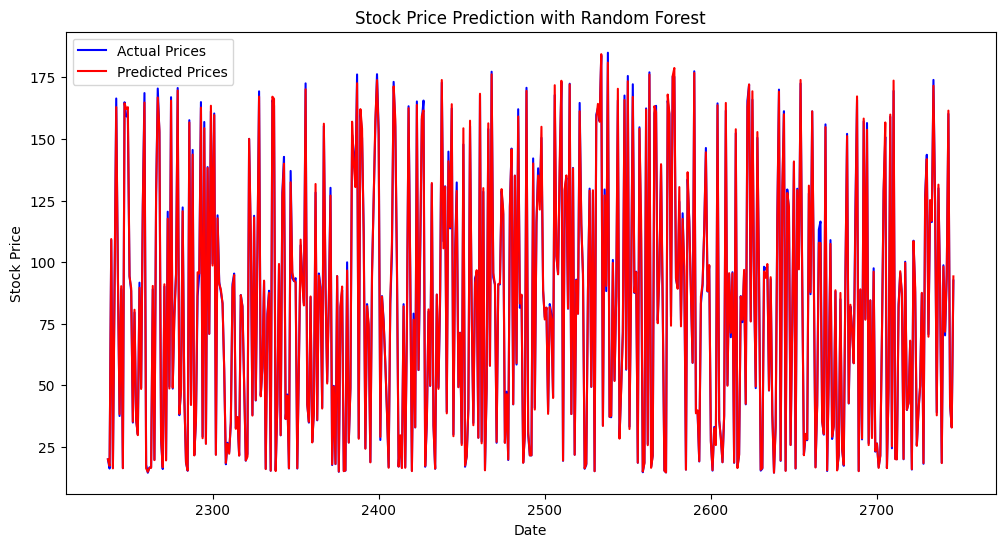

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import ta
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Download historical stock data
def download_stock_data(stock, start, end):
    data = yf.download(stock, start, end)
    data.reset_index(inplace=True)
    print(data)
    return data

# Feature Engineering: Add technical indicators
def add_technical_indicators(data):
    # Moving Averages
    data['ma_50'] = data['Close'].rolling(50).mean()
    data['ma_200'] = data['Close'].rolling(200).mean()

    # MACD (Moving Average Convergence Divergence)
    macd = ta.trend.MACD(data['Close'])
    data['macd'] = macd.macd()
    data['signal_line'] = macd.macd_signal()

    return data

# Data preprocessing
def preprocess_data(data):
    data.dropna(inplace=True)
    features = ['ma_50', 'ma_200', 'macd', 'signal_line']
    X = data[features]
    y = data['Close']
    return X, y

# Split data into training and testing sets
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Train Random Forest model
def train_random_forest_model(X_train, y_train, n_estimators=100, max_depth=None):
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Plot predictions
def plot_predictions(data, y_test, y_pred):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
    plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', color='red')
    plt.title('Stock Price Prediction with Random Forest')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Main function
def main():
    # Download stock data
    start_date = '2013-01-01'
    end_date = '2023-11-30'
    stock_symbol = 'AMZN'  # You can change this to the desired stock symbol
    stock_data = download_stock_data(stock_symbol, start_date, end_date)

    # Add technical indicators
    stock_data = add_technical_indicators(stock_data)

    # Preprocess data
    X, y = preprocess_data(stock_data)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train Random Forest model
    rf_model = train_random_forest_model(X_train, y_train)

    # Evaluate the model
    rmse = evaluate_model(rf_model, X_test, y_test)
    print(f'Model RMSE: {rmse}')

    # Evaluate the model on the training set
    rmse_train = evaluate_model(rf_model, X_train, y_train)
    print(f'Training set RMSE: {rmse_train}')

    # Evaluate the model on the test set
    rmse_test = evaluate_model(rf_model, X_test, y_test)
    print(f'Test set RMSE: {rmse_test}')

    # Plot predictions
    plot_predictions(stock_data, y_test, rf_model.predict(X_test))

if __name__ == "__main__":
    main()


In [ ]:
pip install yfinance pandas ta scikit-learn matplotlib


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=375ac000cec49e6f65ba3f56cb317a75ea4a54e6bde1b4f721e30727ff8a81eb
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
